In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsRegressor


In [ ]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Admission%20Chance.csv')

In [ ]:
df.columns

Index(['Serial No', 'GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
y = df['Chance of Admit ']
X = df[['GRE Score', 'TOEFL Score', 'University Rating', ' SOP',
       'LOR ', 'CGPA', 'Research']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2529)

In [ ]:
categorical_cols = X.select_dtypes(include=['object','bool']).columns

In [ ]:
numerical_cols = X.select_dtypes(include=['int64','float64']).columns

In [ ]:
X.describe().columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
ss = StandardScaler()

In [ ]:
preprocessor=ColumnTransformer(transformers=[("num",ss,numerical_cols), ("cat",ohe,categorical_cols)])

In [ ]:
model = Pipeline(steps=[("data_prep", preprocessor ), ("Binary_class", KNeighborsRegressor() )])

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('data_prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['GRE Score', 'TOEFL Score', 'University Rating', ' SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('Binary_class', KNeighborsRegressor())])

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.09179982303955768

In [ ]:
error_rate = []

for i in range(1,40) :
  knnr = KNeighborsRegressor(n_neighbors=i)
  knnr.fit(X_train, y_train)
  pred_i = knnr.predict(X_test)
  error_rate.append(mean_absolute_error(y_test, pred_i))

In [ ]:
#error_rate

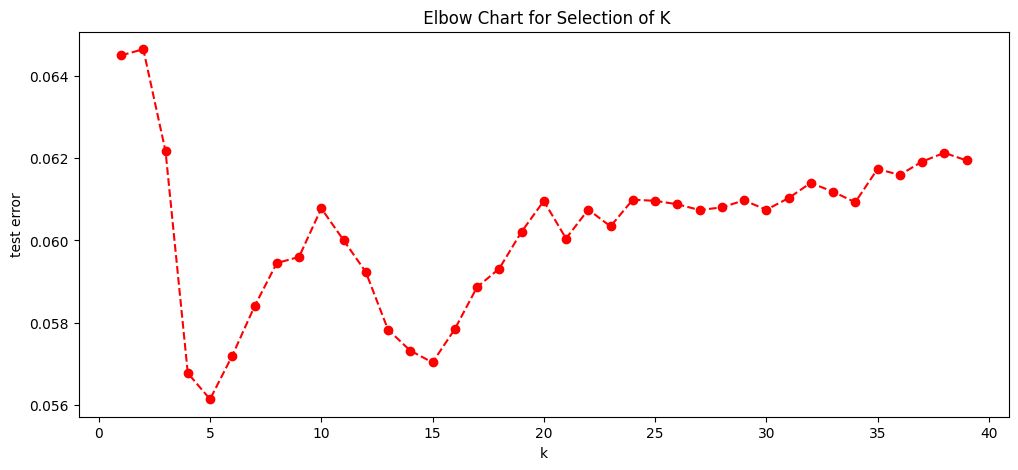

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (12,5))
ax.plot(range(1,40), error_rate, color = 'red', linestyle = '--' , marker = 'o' )
ax.set(xlabel = 'k', ylabel = 'test error', title = ' Elbow Chart for Selection of K')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'Knn-regressor-student-Admision.pkl')

['Knn-regressor-student-Admision.pkl']

In [ ]:
model_1=joblib.load("Knn-regressor-student-Admision.pkl")

In [ ]:
model_1.predict(X_test)

array([0.706, 0.704, 0.662, 0.69 , 0.58 , 0.934, 0.934, 0.72 , 0.832,
       0.682, 0.61 , 0.782, 0.534, 0.792, 0.852, 0.61 , 0.68 , 0.708,
       0.62 , 0.85 , 0.726, 0.902, 0.892, 0.95 , 0.694, 0.704, 0.682,
       0.564, 0.592, 0.636, 0.558, 0.768, 0.664, 0.668, 0.664, 0.508,
       0.466, 0.832, 0.92 , 0.804, 0.718, 0.752, 0.706, 0.91 , 0.782,
       0.778, 0.922, 0.884, 0.638, 0.492, 0.684, 0.61 , 0.88 , 0.506,
       0.726, 0.716, 0.678, 0.668, 0.888, 0.616, 0.686, 0.938, 0.664,
       0.666, 0.758, 0.652, 0.582, 0.936, 0.634, 0.94 , 0.608, 0.942,
       0.64 , 0.77 , 0.548, 0.81 , 0.618, 0.746, 0.652, 0.8  , 0.71 ,
       0.916, 0.658, 0.592, 0.792, 0.674, 0.796, 0.572, 0.744, 0.69 ,
       0.784, 0.754, 0.94 , 0.708, 0.672, 0.632, 0.684, 0.686, 0.756,
       0.606])

Text(0, 0.5, 'Chance of Admit')

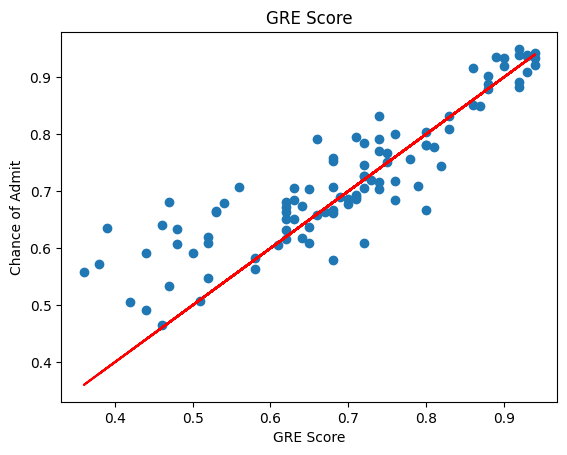

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='r')
plt.title('GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')